In [1]:
from pipeline.analytics import TechDashboard, TechnicalIndicators, Stock, StockMetrics

In [2]:
stock = Stock(
    symbol='TSLA'
)
technicalIndicators = TechnicalIndicators(stock.data, stock.symbol)
dashboard= TechDashboard(technicalIndicators)
dashboard.plot()

[*********************100%***********************]  1 of 1 completed


In [3]:
# Create an instance of StockMetrics
stock_metrics = StockMetrics(stock.symbol, stock.info)

# Create the subplot
stock_metrics.create_subplot()

# Imports

In [145]:
from IPython.core.interactiveshell import InteractiveShell

from datetime import timedelta
from typing import Any, List, Tuple

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from plotly.subplots import make_subplots
import ta
import yfinance as yf
from pandas import DataFrame, Series
from pandas.core.frame import DataFrame
from yfinance.ticker import Ticker

# output every line of the cell
InteractiveShell.ast_node_interactivity = "all"

# Set the default template to plotly_dark
pio.templates.default = "plotly_dark"

from warnings import filterwarnings

filterwarnings("ignore")

# Collect Data

In [134]:
class Stock:
    """
    A class for retrieving historical stock data from Yahoo Finance using the yfinance library.

    Args:
    ----------
        symbol (str): The stock symbol to retrieve data for.
        
        start_date (str, optional): The start date of the date range to retrieve data for, in YYYY-MM-DD format. If not specified, defaults to the earliest available date for the given stock.
        
        end_date (str, optional): The end date of the date range to retrieve data for, in YYYY-MM-DD format. If not specified, defaults to the current date.
        
        interval (str, optional): The time interval between data points. Valid values are '1d' (daily), '1wk' (weekly), '1mo' (monthly), '1m' (1-minute), '2m' (2-minute), '5m' (5-minute), '15m' (15-minute), '30m' (30-minute), '60m' (60-minute), '90m' (90-minute), and '1h' (hourly). Default is '1d' for daily data.

    Attributes:
    ----------
        symbol (str): The stock symbol being retrieved.
        
        start_date (str): The actual start date of the retrieved data, in YYYY-MM-DD format.
        
        end_date (str): The actual end date of the retrieved data, in YYYY-MM-DD format.
        
        interval (str): The time interval between data points.
        
        data (pandas.DataFrame): A DataFrame containing the retrieved stock data.
        
        ticker (yfinance.ticker.Ticker): A Ticker object for the given stock symbol.
        
        info (dict): A dictionary containing information about the stock, such as its name and industry.

    Methods:
    ----------
        startup(symbol: str, start_date: str, end_date: str, interval: str) -> None:
            Constructs a new StockData object and downloads the stock data from Yahoo Finance.

    Usage:
    ----------
        # Instantiate a Stock object
        >>> stock = Stock(symbol="AAPL", start_date="2020-01-01", end_date="2022-04-17", interval="1d")

        # Access stock data
        >>> stock.data

        # Access stock information
        >>> stock.info
    """

    def __init__(self, symbol, start_date=None, end_date=None, interval="1d") -> None:
        self.startup(symbol, start_date, end_date, interval)

    def startup(self, symbol, start_date, end_date, interval) -> None:
        """
        Constructs a new StockData object and downloads the stock data from Yahoo Finance.

        Args:
            symbol (str): The stock symbol to retrieve data for.

            start_date (str): The start date of the date range to retrieve data for, in YYYY-MM-DD format.

            end_date (str): The end date of the date range to retrieve data for, in YYYY-MM-DD format.

            interval (str, optional): The time interval between data points. Default is '1d' for daily data. Valid values are '1d' (daily), '1wk' (weekly), '1mo' (monthly), '1m' (1-minute), '2m' (2-minute), '5m' (5-minute), '15m' (15-minute), '30m' (30-minute), '60m' (60-minute), '90m' (90-minute), and '1h' (hourly).
        """
        self.symbol: str = symbol
        self.start_date: str = start_date
        self.end_date: str = end_date
        self.interval: str = interval
        self.data: DataFrame = yf.download(
            symbol, start=start_date, end=end_date, interval=interval
        )
        if self.start_date is None and self.end_date is None:
            self.start_date = str(self.data.iloc[0].name)
            self.end_date = str(self.data.iloc[-1].name)
        self.ticker: Ticker = yf.Ticker(symbol)
        self.info: dict[Any, Any] = self.ticker.info

    def __repr__(self) -> str:
        """
        Returns a string representation of the StockData object.
        """
        return f"StockData(symbol={self.symbol}, start_date={self.start_date}, end_date={self.end_date}, interval={self.interval})"

    def __str__(self) -> str:
        """
        Returns a string representation of the stock data.
        """
        return str(self.data)

In [135]:
stock = Stock(
    symbol='TSLA'
)
stock

[*********************100%***********************]  1 of 1 completed


StockData(symbol=TSLA, start_date=2010-06-29 00:00:00, end_date=2023-04-14 00:00:00, interval=1d)

In [136]:
stock.data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2023-04-10  179.940002  185.100006  176.110001  184.509995  184.509995   
2023-04-11  186.690002  189.190002  185.649994  186.789993  186.789993   
2023-04-12  190.740005  191.580002  180.309998  180.539993  180.539993   
2023-04-13  182.960007  186.500000  180.940002  185.899994  185.899994   
2023-04-14  183.949997  186.279999  182.009995  185.000000  185.000000   

               Volume  
Date                   
2010-06-29  281494500  
2010-06-30  257806500  
2010-07-01  123282000  
2010-07-02   77097000  
2010-07-06  103003500  
...               ...  
2023-04-10  142154600  
2023-04-11  115770900  
2023-04-12  150256300  
2023-04-13  112933000  
2023-04-14   96306500  

[3221 rows x 6 columns]

In [137]:
stock.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its company-owned service locations and Tesla mo

# Anomalies

Using the Z-score method and rolling average method can help us gain insights into the behavior of a stock over time and identify potential anomalies or outliers that may warrant further investigation. Here are a few insights we can gain from these methods:

1. Overall trend: By plotting the historical closing prices of a stock over time, we can gain insights into the overall trend of the stock. If the stock price is generally increasing or decreasing over time, this may indicate a long-term bullish or bearish trend, respectively.

2. Short-term movements: By calculating the rolling average of the closing prices over a certain time window (e.g., 30 days), we can gain insights into short-term movements in the stock price. If the rolling average is increasing or decreasing, this may indicate a short-term bullish or bearish trend, respectively.

3. Potential outliers: By identifying data points with a Z-score greater than a certain threshold (e.g., 3), we can flag potential outliers or extreme movements in the stock price that may be worth investigating further. Similarly, by identifying data points that are a certain number of standard deviations away from the rolling average (e.g., 2 or 3 standard deviations), we can identify data points that deviate significantly from the short-term trend and may be worth investigating further.

4. Volatility: By calculating the standard deviation of the closing prices over a certain time window, we can gain insights into the volatility of the stock. A high standard deviation may indicate a more volatile stock that experiences larger swings in price over time.

By combining these insights with other forms of analysis (e.g., fundamental analysis, technical analysis), we can gain a more comprehensive understanding of the behavior of a stock over time and make more informed investment decisions.

Threshold choices:

- Z-score:
    Z-score > 3 is a commonly used threshold in statistics for detecting extreme values or outliers.

    In general, a Z-score greater than 3 indicates that the data point is more than 3 standard deviations away from the mean, which corresponds to the top 0.3% of the distribution. This means that data points with a Z-score greater than 3 are considered to be extremely unlikely under a normal distribution, and are therefore often considered to be outliers.

- The value 2 in (closing_prices - rolling_mean) > 2 * rolling_std is a commonly used threshold in statistics for detecting outliers based on standard deviations away from the mean.

    In general, this threshold identifies data points that are more than 2 standard deviations away from the rolling mean of the stock prices over a certain time window. Using a threshold of 2 is considered to be a moderate level of sensitivity for detecting outliers, meaning that it will identify data points that deviate significantly from the rolling average but are not too extreme.



The choice of threshold for identifying outliers in stock data depends on the specific characteristics of the data and the goals of the analysis. A higher or lower threshold may be appropriate depending on the volatility of the stock price or the desired level of sensitivity for detecting potential outliers. It is important to be mindful of false positives and false negatives when using any outlier detection method, and to carefully evaluate any identified outliers to determine whether they represent legitimate trends or events in the stock data.

Sources/Literature
- "Anomaly Detection for Financial Markets" by Tsay (2014) 
- "Outlier Detection in Time Series Data" by Chandola et al. 

## Thresholds

In [138]:
class StockOutliersDetector:
    """
    A class for detecting outliers in stock data.

    Args:
    ---------
        stock_data (pandas.DataFrame): The stock data to analyze.
        
        z_threshold (int, optional): The number of standard deviations from the mean at which to consider a point a 
            z-score outlier. Defaults to 3.
            
        rolling_threshold (int, optional): The number of standard deviations from the rolling mean at which to 
            consider a point a rolling outlier. Defaults to 2.
            
        rolling_window (int, optional): The window size in days for calculating the rolling mean and standard deviation. 
            Defaults to 30.

    Attributes:
    ---------
        stock_data (pandas.DataFrame): The stock data to analyze.
        
        z_threshold (int): The number of standard deviations from the mean at which to consider a point a z-score outlier.
        
        rolling_threshold (int): The number of standard deviations from the rolling mean at which to consider a point 
            a rolling outlier.
            
        rolling_window (int): The window size in days for calculating the rolling mean and standard deviation.

    Methods:
    ---------
        _calculate_z_scores(self) -> pandas.Series:
            Calculates the z-scores for the closing prices.

        _calculate_rolling_mean_and_std(self) -> Tuple[pandas.Series, pandas.Series]:
            Calculates the rolling mean and standard deviation for the closing prices.

        detect_outliers(self) -> Tuple[np.ndarray, np.ndarray]:
            Detects z-score outliers and rolling outliers in the closing prices.

        get_outliers_traces(self) -> List[plotly.graph_objects.Scatter]:
            Returns a list of Scatter traces for the closing prices and detected outliers.

        fig(self) -> plotly.graph_objects.Figure:
            Returns a Figure object containing the closing prices and detected outliers.

    Usage:
    ---------
        # Create a StockOutliersDetector object
        >>> detector = StockOutliersDetector(stock_data)

        # Detect outliers
        >>> zscore_outliers_mask, rolling_outliers_mask = detector.detect_outliers()

        # Get scatter traces for closing prices and detected outliers
        >>> traces = detector.get_outliers_traces()

        # Create a plotly figure
        >>> fig = detector.fig()
    """
    def __init__(
        self, stock_data, z_threshold=3, rolling_threshold=2, rolling_window=30
    ) -> None:
        self.stock_data = stock_data
        self.z_threshold: int = z_threshold
        self.rolling_threshold: int = rolling_threshold
        self.rolling_window = rolling_window

    def _calculate_z_scores(self):
        closing_prices = self.stock_data["Close"]
        return (closing_prices - np.mean(closing_prices)) / np.std(closing_prices)

    def _calculate_rolling_mean_and_std(self):
        closing_prices = self.stock_data["Close"]
        return (
            closing_prices.rolling(window=self.rolling_window).mean(),
            closing_prices.rolling(window=self.rolling_window).std(),
        )

    def detect_outliers(self):
        closing_prices = self.stock_data["Close"]
        z_scores = self._calculate_z_scores()
        rolling_mean, rolling_std = self._calculate_rolling_mean_and_std()

        zscore_outliers_mask = z_scores > self.z_threshold
        rolling_outliers_mask = (closing_prices - rolling_mean) > self.rolling_threshold * rolling_std

        return zscore_outliers_mask, rolling_outliers_mask

    def get_outliers_traces(self):
        zscore_outliers_mask, rolling_outliers_mask = self.detect_outliers()
        closing_prices = self.stock_data["Close"]

        zscore_trace = go.Scatter(
            x=closing_prices.index,
            y=closing_prices.where(zscore_outliers_mask, np.nan),
            mode="markers",
            name="Z-score Outliers",
            marker=dict(
                symbol="triangle-down",
                color="red",
                size=10,
                line=dict(width=1, color="black"),
            ),
            showlegend=True,
            legendgroup="Close and Outliers",
            legendgrouptitle_text="Close and Outliers",
        )

        rolling_trace = go.Scatter(
            x=closing_prices.index,
            y=closing_prices.where(rolling_outliers_mask, np.nan),
            mode="markers",
            name="Rolling Outliers",
            marker=dict(
                symbol="triangle-down",
                color="green",
                size=10,
                line=dict(width=1, color="black"),
            ),
            showlegend=True,
            legendgroup="Close and Outliers",
            legendgrouptitle_text="Close and Outliers",
        )

        close_trace = go.Scatter(
            x=closing_prices.index,
            y=closing_prices,
            mode="lines",
            name="Close Price",
            line=dict(color="blue"),
            showlegend=True,
            legendgroup="Close and Outliers",
            legendgrouptitle_text="Close and Outliers",
        )

        return [close_trace, zscore_trace, rolling_trace]

    def fig(self) -> go.Figure:
        fig = go.Figure()

        for trace in self.get_outliers_traces():
            fig.add_trace(trace)

        fig.update_layout(
            title="Stock Price with Outliers Detected",
            xaxis_title="Date",
            yaxis_title="Closing Price",
        )
        closing_prices = self.stock_data["Close"]
        min_date = closing_prices.index.min()
        max_date = closing_prices.index.max()
        fig.update_xaxes(range=[min_date, max_date])

        return fig

Here is an example of how it works

In [139]:
outliers_detector = StockOutliersDetector(
    stock.data, z_threshold=3, rolling_threshold=2, rolling_window=30
)
outliers_detector.fig()

A screenshot of the interactive plot

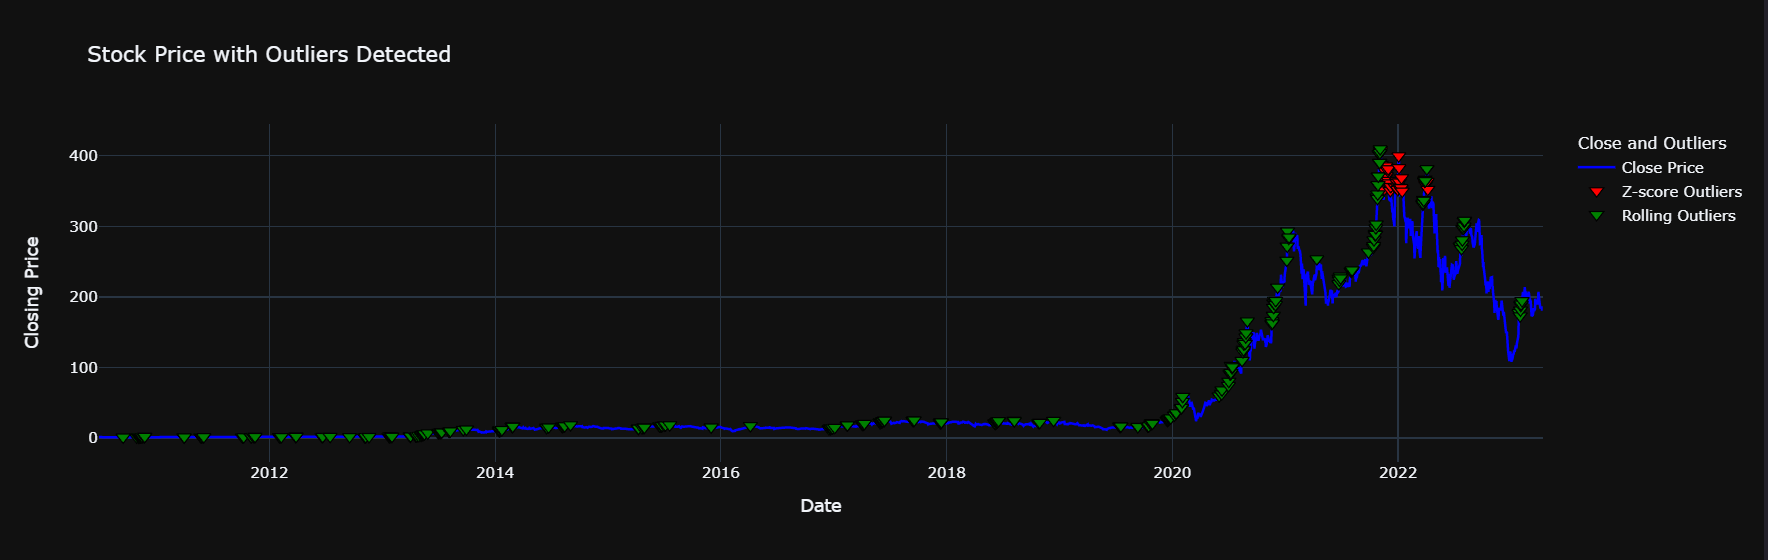

# Technical Indicators

For our analysis we will use the following most prominent and all-time popular indicators: 


#### Moving averages:

- Help to smooth out price fluctuations and identify trends in the data over time.
Provide an indication of the average price of a security over a specific period.
Can be used to identify support and resistance levels, and to signal potential trend reversals.

#### Relative Strength Index (RSI):

- Measures the strength of a security's recent price movements.
Ranges from 0 to 100, with values above 70 indicating an overbought condition and values below 30 indicating an oversold condition.
Can be used to identify potential trend reversals and to confirm the strength of an existing trend.

#### Moving Average Convergence Divergence (MACD):

- Uses moving averages to identify changes in momentum and trend.
Consists of two lines - the MACD line and the signal line - that cross over each other to generate buy and sell signals.
Can be used to identify potential trend reversals and to confirm the strength of an existing trend.

#### Average Directional Index (ADX):

- Measures the strength of a trend, whether it's up or down.
Ranges from 0 to 100, with values above 25 indicating a strong trend.
Can be used to identify potential trend reversals and to determine whether a security is in a trading range or trending.

#### On-Balance Volume (OBV):

- Measures buying and selling pressure by tracking the volume of trades on up and down days.
When the OBV is rising, it indicates that buying pressure is increasing, and when it's falling, it indicates that selling pressure is increasing.

- Can be used to confirm the strength of a trend and to identify potential trend reversals.
These technical indicators are valuable tools for traders and investors looking to analyze financial market data and make informed decisions about their investments. By understanding the signals generated by these indicators, investors can gain insights into the direction and momentum of a security's price movements and adjust their investment strategies accordingly.

In [140]:
class TechnicalIndicators:
    """
    A class that calculates various technical indicators for a given stock price dataset.

    Args:
    -----------
        data (pandas.DataFrame): The stock price dataset to calculate technical indicators for.
        symbol (str): The stock symbol to retrieve data for.
        sma_window (int, optional): The window size for the simple moving average. Default is 20.
        ema_window (int, optional): The window size for the exponential moving average. Default is 20.
        rsi_window (int, optional): The window size for the Relative Strength Index. Default is 14.
        adx_window (int, optional): The window size for the Average Directional Index. Default is 14.
        bb_window (int, optional): The window size for the Bollinger Bands. Default is 20.
        bb_std (float, optional): The number of standard deviations to use for the Bollinger Bands. Default is 2.

    Attributes:
    -------------
        data (pandas.DataFrame): The stock price dataset to calculate technical indicators for.
        symbol (str): The stock symbol to retrieve data for.
        sma_window (int): The window size for the simple moving average.
        ema_window (int): The window size for the exponential moving average.
        rsi_window (int): The window size for the Relative Strength Index.
        adx_window (int): The window size for the Average Directional Index.
        bb_window (int): The window size for the Bollinger Bands.
        bb_std (float): The number of standard deviations to use for the Bollinger Bands.

    Methods:
    -----------
        calculate_sma() -> pandas.Series:
            Calculates the simple moving average and adds it to the dataset.
            Returns:
                pandas.Series: The simple moving average.

        calculate_ema() -> pandas.Series:
            Calculates the exponential moving average and adds it to the dataset.
            Returns:
                pandas.Series: The exponential moving average.

        calculate_macd() -> pandas.DataFrame:
            Calculates the Moving Average Convergence Divergence (MACD) and adds it to the dataset.
            Returns:
                pandas.DataFrame: A dataframe with the MACD, signal line, and histogram.

        calculate_rsi() -> pandas.Series:
            Calculates the Relative Strength Index (RSI) and adds it to the dataset.
            Returns:
                pandas.Series: The RSI.

        calculate_adx() -> pandas.Series:
            Calculates the Average Directional Index (ADX) and adds it to the dataset.
            Returns:
                pandas.Series: The ADX.

        calculate_obv() -> pandas.Series:
            Calculates the On-Balance Volume (OBV) and adds it to the dataset.
            Returns:
                pandas.Series: The OBV.

        calculate_bollinger_bands(window=20, k=2) -> pandas.DataFrame:
            Calculates the Bollinger Bands and adds them to the dataset.
            Args:
                window (int, optional): The window size for the moving average. Default is 20.
                k (float, optional): The number of standard deviations to use for the upper and lower bands.
                    Default is 2.
            Returns:
                pandas.DataFrame: The complete dataset with the Bollinger Bands appended to it.

        calculate_all(sma_window=None, ema_window=None, rsi_window=None, adx_window=None, bb_window=None, bb_std=None) -> pandas.DataFrame:
            Calculates all technical indicators and adds them to the dataset.
            Args:
                sma_window (int, optional): The window size for the simple moving average. Default is the value specified in the constructor.
                ema_window (int, optional): The window size for the exponential moving average. Default is the value specified in the constructor.
                rsi_window (int, optional): The window size for the Relative Strength Index. Default is the value specified in the constructor.
                adx_window (int, optional): The window size for the Average Directional Index. Default is the value specified in the constructor.
                bb_window (int, optional): The window size for the Bollinger Bands. Default is the value specified in the constructor.
                bb_std (float, optional): The number of standard deviations to use for the Bollinger Bands. Default is the value specified in the constructor.
            Returns:
                pandas.DataFrame: The complete dataset with the technical indicators appended to it.
                
    """
    def __init__(
        self, data: DataFrame, symbol: str, sma_window=20, ema_window=20, rsi_window=14, adx_window=14, bb_window=20, bb_std=2
    ) -> None:
        """
        Constructs a new TechnicalIndicators object.

        Args:
            data (pandas.DataFrame): The stock price dataset to calculate technical indicators for.
            sma_window (int, optional): The window size for the simple moving average. Default is 20.
            ema_window (int, optional): The window size for the exponential moving average. Default is 20.
            rsi_window (int, optional): The window size for the Relative Strength Index. Default is 14.
            adx_window (int, optional): The window size for the Average Directional Index. Default is 14.
            bb_window (int, optional): The window size for the Bollinger Bands. Default is 20.
            bb_std (float, optional): The number of standard deviations to use for the Bollinger Bands. Default is 2.
        """
        self.data: DataFrame = data.copy()
        self.symbol: str = symbol
        self.sma_window: int = sma_window
        self.ema_window: int = ema_window
        self.rsi_window: int = rsi_window
        self.adx_window: int = adx_window
        self.bb_window: int = bb_window
        self.bb_std: int = bb_std

    def calculate_sma(self) -> Series:
        """
        Calculates the simple moving average and adds it to the dataset.

        Returns:
            pandas.Series: The simple moving average.
        """
        sma: Series = ta.trend.sma_indicator(self.data["Close"], window=self.sma_window)
        self.data["SMA"] = sma
        return sma

    def calculate_ema(self) -> Series:
        """
        Calculates the exponential moving average and adds it to the dataset.

        Returns:
            pandas.Series: The exponential moving average.
        """
        ema: Series = ta.trend.ema_indicator(self.data["Close"], window=self.ema_window)
        self.data["EMA"] = ema
        return ema

    def calculate_macd(self) -> Series:
        """
        Calculates the Moving Average Convergence Divergence (MACD) and adds it to the dataset.

        Returns:
            pandas.DataFrame: A dataframe with the MACD, signal line, and histogram.
        """
        macd, signal, hist = (
            ta.trend.macd(self.data["Close"]),
            ta.trend.macd_signal(self.data["Close"]),
            ta.trend.macd_diff(self.data["Close"]),
        )
        self.data["MACD"] = macd
        self.data["Signal"] = signal
        self.data["Histogram"] = hist
        return self.data[["MACD", "Signal", "Histogram"]]

    def calculate_rsi(self) -> Series:
        """
        Calculates the Relative Strength Index (RSI) and adds it to the dataset.

        Returns:
            pandas.Series: The RSI.
        """
        rsi: Series = ta.momentum.rsi(self.data["Close"], window=self.rsi_window)
        self.data["RSI"] = rsi
        return rsi
    
    def calculate_adx(self) -> Series:
            """
            Calculates the Average Directional Index (ADX) and adds it to the dataset.

            Returns:
                pandas.Series: The ADX.
            """
            adx: Series = ta.trend.adx(
                self.data["High"],
                self.data["Low"],
                self.data["Close"],
                window=self.adx_window,
                fillna=True,
            )
            self.data["ADX"] = adx
            return adx    


    def calculate_obv(self) -> Series:
        """
        Calculates the On-Balance Volume (OBV) and adds it to the dataset.

        Returns:
            pandas.Series: The OBV.
        """
        obv: Series = ta.volume.on_balance_volume(self.data["Close"], self.data["Volume"])
        self.data["OBV"] = obv
        return obv

    def calculate_bollinger_bands(self, window=20, k=2) -> DataFrame:
        """
        Calculates the Bollinger Bands and adds them to the dataset.

        Args:
            window (int, optional): The window size for the moving average. Default is 20.
            k (float, optional): The number of standard deviations to use for the upper and lower bands.
                Default is 2.

        Returns:
            pandas.DataFrame: The complete dataset with the Bollinger Bands appended to it.
        """
        ma: Series = ta.trend.sma_indicator(self.data["Close"], window=window)
        std: Series = ta.volatility.bollinger_mavg(self.data["Close"], window=window, fillna=True)
        upper_band: Series = ma + k * std
        lower_band: Series = ma - k * std
        band_width: Series = (upper_band - self.data["Close"]) / self.data["Close"]

        self.data["Upper Band"] = upper_band
        self.data["Lower Band"] = lower_band
        self.data["Band Width"] = band_width

        return self.data


    def calculate_all(
        self, sma_window=None, ema_window=None, rsi_window=None, adx_window=None, bb_window=None, bb_std=None
    ) -> DataFrame:
        """
        Calculates all technical indicators and adds them to the dataset.

        Args:
            sma_window (int, optional): The window size for the simple moving average. Default is the value specified in the constructor.
            ema_window (int, optional): The window size for the exponential moving average. Default is the value specified in the constructor.
            rsi_window (int, optional): The window size for the Relative Strength Index. Default is the value specified in the constructor.
            adx_window (int, optional): The window size for the Average Directional Index. Default is the value specified in the constructor.
            bb_window (int, optional): The window size for the Bollinger Bands. Default is the value specified in the constructor.
            bb_std (float, optional): The number of standard deviations to use for the Bollinger Bands. Default is the value specified in the constructor.

        Returns:
            pandas.DataFrame: The complete dataset with the technical indicators appended to it.
        """
        if sma_window is not None:
            self.sma_window = sma_window
        if ema_window is not None:
            self.ema_window = ema_window
        if rsi_window is not None:
            self.rsi_window = rsi_window
        if adx_window is not None:
            self.adx_window = adx_window
        if bb_window is not None:
            self.bb_window = bb_window
        if bb_std is not None:
            self.bb_std = bb_std

        self.calculate_sma()
        self.calculate_ema()
        self.calculate_macd()
        self.calculate_rsi()
        self.calculate_adx()
        self.calculate_obv()
        self.calculate_bollinger_bands()

        return self.data

In [141]:
technicalIndicators = TechnicalIndicators(stock.data, stock.symbol)
df: DataFrame = technicalIndicators.calculate_all()

Overview of the dataframe including all the technical indicators

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3221 entries, 2010-06-29 to 2023-04-14
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3221 non-null   float64
 1   High        3221 non-null   float64
 2   Low         3221 non-null   float64
 3   Close       3221 non-null   float64
 4   Adj Close   3221 non-null   float64
 5   Volume      3221 non-null   int64  
 6   SMA         3202 non-null   float64
 7   EMA         3202 non-null   float64
 8   MACD        3196 non-null   float64
 9   Signal      3188 non-null   float64
 10  Histogram   3188 non-null   float64
 11  RSI         3208 non-null   float64
 12  ADX         3221 non-null   float64
 13  OBV         3221 non-null   int64  
 14  Upper Band  3202 non-null   float64
 15  Lower Band  3202 non-null   float64
 16  Band Width  3202 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 453.0 KB


In [143]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'EMA',
       'MACD', 'Signal', 'Histogram', 'RSI', 'ADX', 'OBV', 'Upper Band',
       'Lower Band', 'Band Width'],
      dtype='object')

In [144]:
df.iloc[40:45]

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-08-25  1.277333  1.332000  1.237333  1.326667   1.326667   7549500   
2010-08-26  1.326000  1.351333  1.306667  1.316667   1.316667   6507000   
2010-08-27  1.316667  1.324667  1.300000  1.313333   1.313333   5694000   
2010-08-30  1.313333  1.346000  1.307333  1.324667   1.324667  10992000   
2010-08-31  1.310667  1.319333  1.288667  1.298667   1.298667   3016500   

                 SMA       EMA      MACD    Signal  Histogram        RSI  \
Date                                                                       
2010-08-25  1.302433  1.300572 -0.022248 -0.031415   0.009168  51.202989   
2010-08-26  1.300433  1.302105 -0.018465 -0.028825   0.010361  50.232016   
2010-08-27  1.299633  1.303174 -0.015556 -0.026171   0.010615  49.892323   
2010-08-30  1.296133  1.305221 -0.012196 -0.023376   0.011180  51.102918   
2010-08-31  1.287900  1.304597 -0.011498 -0.021001   0.009502  48.224588   

                 ADX        OBV  Upper Band  Lower Band  Band Width  
Date                                                                 
2010-08-25  6.780158 -175060500      3.9073   -1.302433    1.945200  
2010-08-26  6.928060 -181567500      3.9013   -1.300433    1.963012  
2010-08-27  6.962826 -187261500      3.8989   -1.299633    1.968706  
2010-08-30  7.282673 -176269500      3.8884   -1.296133    1.935379  
2010-08-31  7.266358 -179286000      3.8637   -1.287900    1.975128

# Technical Dashboard

In order to create our dashboard and have clean/readable code we introduce 5 classes that will provide us with the figures needed. These classes will be called MACDSubplot, RSI_ADXSubplot, BBANDSSubplot, CANDLESMASubplot, DINDICATORSSubplot and can also be used as standalone classes.

## MACDSubplot

In [148]:
class MACDSubplot:
    """
    A class that generates a MACD subplot using Plotly.

    Args:
    -----------
        df (pandas.DataFrame): The stock price dataset with MACD data.

    Attributes:
    -----------
        data (pandas.DataFrame): The stock price dataset with MACD data.

    Methods:
    -----------
        generate_macd(): Generates a MACD line chart.
        generate_macd_signal(): Generates a MACD signal line chart.
        generate_macd_histogram(): Generates a MACD histogram bar chart.
        fig(): Combines all the MACD charts into a single subplot.
    """

    def __init__(self, df: DataFrame) -> None:
        """
        Constructs a new MACDSubplot object.

        Args:
            df (pandas.DataFrame): The stock price dataset with MACD data.
        """
        self.data: DataFrame = df

    def generate_macd(self) -> go.Scatter:
        """
        Generates a MACD line chart.

        Returns:
            plotly.graph_objs.Scatter: The MACD chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["MACD"],
            mode="lines",
            name="MACD",
            legendgroup="MACD",
            legendgrouptitle_text="MACD",
        )

    def generate_macd_signal(self) -> go.Scatter:
        """
        Generates a MACD signal line chart.

        Returns:
            plotly.graph_objs.Scatter: The MACD signal line chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["Signal"],
            mode="lines",
            name="Signal",
            legendgroup="MACD",
            legendgrouptitle_text="MACD",
        )

    def generate_macd_histogram(self) -> go.Bar:
        """
        Generates a MACD histogram bar chart.

        Returns:
            plotly.graph_objs.Bar: The MACD histogram chart.
        """
        return go.Bar(
            x=self.data.index,
            y=self.data["Histogram"],
            name="Histogram",
            legendgroup="MACD",
            legendgrouptitle_text="MACD",
        )

    def fig(self) -> tuple[go.Scatter, go.Scatter, go.Bar]:
        """
        Combines all the MACD charts into a single subplot.

        Returns:
            tuple: A tuple of MACD line chart, MACD signal line chart, and MACD histogram bar chart.
        """
        return (
            self.generate_macd(),
            self.generate_macd_signal(),
            self.generate_macd_histogram()
        )

## RSI_ADXSubplot

In [149]:
class RSI_ADXSubplot:
    """
    A class for generating a subplot of Relative Strength Index (RSI) and
    Average Directional Index (ADX) technical indicators for a given stock price dataset.

    Args:
    -----------
        df (pandas.DataFrame): The stock price dataset with RSI and ADX data.

    Attributes:
    -----------
        data (pandas.DataFrame): The stock price dataset with RSI and ADX data.

    Methods:
    -----------
        generate_rsi_chart() -> plotly.graph_objs.Scatter:
            Generates a Relative Strength Index (RSI) line chart.

        generate_rsi_30_line() -> plotly.graph_objs.Scatter:
            Generates a dashed line representing the RSI threshold of 30.

        generate_rsi_70_line() -> plotly.graph_objs.Scatter:
            Generates a dashed line representing the RSI threshold of 70.

        generate_adx_chart() -> plotly.graph_objs.Scatter:
            Generates an Average Directional Index (ADX) line chart.

        fig() -> Tuple[plotly.graph_objs.Scatter]:
            Plots the RSI and ADX charts.
    """
    def __init__(self, df: DataFrame) -> None:
        """
        Constructs a new RSI_ADXSubplot object.

        Args:
            df (pandas.DataFrame): The stock price dataset with RSI and ADX data.
        """
        self.data: DataFrame = df

    def generate_rsi_chart(self) -> go.Scatter:
        """
        Generates a Relative Strength Index (RSI) line chart.

        Returns:
            plotly.graph_objs.Scatter: The RSI chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["RSI"],
            mode="lines",
            name=f"RSI ({self.data['RSI'].name})",
            line=dict(color="blue"),
            legendgroup="RSI and ADX",
            legendgrouptitle_text="RSI and ADX",
        )

    def generate_rsi_30_line(self) -> go.Scatter:
        """
        Generates a dashed line representing the RSI threshold of 30.

        Returns:
            plotly.graph_objs.Scatter: The RSI 30 line.
        """
        return go.Scatter(
            x=self.data.index,
            y=[30] * len(self.data.index),
            mode="lines",
            name="RSI 30",
            line=dict(color="red", dash="dash"),
            legendgroup="RSI and ADX",
            legendgrouptitle_text="RSI and ADX",
        )

    def generate_rsi_70_line(self) -> go.Scatter:
        """
        Generates a dashed line representing the RSI threshold of 70.

        Returns:
            plotly.graph_objs.Scatter: The RSI 70 line.
        """
        return go.Scatter(
            x=self.data.index,
            y=[70] * len(self.data.index),
            mode="lines",
            name="RSI 70",
            line=dict(color="green", dash="dash"),
            legendgroup="RSI and ADX",
            legendgrouptitle_text="RSI and ADX",
        )

    def generate_adx_chart(self) -> go.Scatter:
        """
        Generates an Average Directional Index (ADX) line chart.

        Returns:
            plotly.graph_objs.Scatter: The ADX chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["ADX"],
            mode="lines",
            name=f"ADX ({self.data['ADX'].name})",
            legendgroup="RSI and ADX",
            legendgrouptitle_text="RSI and ADX",
        )

    def fig(self) -> tuple[go.Scatter, go.Scatter, go.Scatter, go.Scatter]:
        """
        Plots the RSI and ADX charts.

        Returns:
            tuple[plotly.graph_objs.Scatter]: A tuple of the RSI chart, RSI 30 line, RSI 70 line, and ADX chart.
        """
        return (
            self.generate_rsi_chart(),
            self.generate_rsi_30_line(),
            self.generate_rsi_70_line(),
            self.generate_adx_chart()
        )

## BBANDSSubplot

In [150]:
class BBANDSSubplot:
    """
    A class used to represent a subplot containing Bollinger Bands data for stock prices.

    Args:
    ----------
        df (pandas.DataFrame): The stock price dataset with Bollinger Bands data.

    Attributes:
    ----------
        data (pandas.DataFrame): The stock price dataset with Bollinger Bands data.

    Methods:
    ----------
        generate_upper_band() -> go.Scatter:
            Generates an upper Bollinger Band line chart.

        generate_band_width() -> go.Scatter:
            Generates a mid Bollinger Band line chart.

        generate_lower_band() -> go.Scatter:
            Generates a lower Bollinger Band line chart.

        fig() -> tuple[go.Scatter, go.Scatter, go.Scatter]:
            Returns all three Bollinger Bands charts as a tuple of Scatter objects.

    This class generates a subplot that displays Bollinger Bands data for stock prices. It takes in a `pandas.DataFrame` object that contains the stock price data and the Bollinger Bands data. Once the object is created, you can generate the subplot using the `fig()` method.

    The `generate_upper_band()` method generates the upper Bollinger Band line chart.

    The `generate_band_width()` method generates the mid Bollinger Band line chart.

    The `generate_lower_band()` method generates the lower Bollinger Band line chart.

    The `fig()` method returns all three Bollinger Bands charts as a tuple of `plotly.graph_objs.Scatter` objects.
    """   
    def __init__(self, df: DataFrame) -> None:
        """
        Constructs a new BBANDSSubplot object.

        Args:
            df (pandas.DataFrame): The stock price dataset with Bollinger Bands data.
        """
        self.data: DataFrame = df

    def generate_upper_band(self) -> go.Scatter:
        """
        Generates an upper Bollinger Band line chart.

        Returns:
            plotly.graph_objs.Scatter: The upper Bollinger Band chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["Upper Band"],
            mode="lines",
            name="Bollinger Bands (Upper)",
            legendgroup="Bollinger Bands",
            legendgrouptitle_text="BBANDS",
        )

    def generate_band_width(self) -> go.Scatter:
        """
        Generates a mid Bollinger Band line chart.

        Returns:
            plotly.graph_objs.Scatter: The mid Bollinger Band chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["Band Width"],
            mode="lines",
            name="Bollinger Bands (Mid)",
            legendgroup="Bollinger Bands",
            legendgrouptitle_text="BBANDS",
        )

    def generate_lower_band(self) -> go.Scatter:
        """
        Generates a lower Bollinger Band line chart.

        Returns:
            plotly.graph_objs.Scatter: The lower Bollinger Band chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["Lower Band"],
            mode="lines",
            name="Bollinger Bands (Lower)",
            legendgroup="Bollinger Bands",
            legendgrouptitle_text="BBANDS",
        )

    def fig(self) -> tuple[go.Scatter, go.Scatter, go.Scatter]:
        """
        Returns all the figures.

        Returns:
            tuple[plotly.graph_objs.Scatter]: A tuple of the three Bollinger Bands charts.
        """
        return (
            self.generate_upper_band(),
            self.generate_band_width(),
            self.generate_lower_band(),
        )


## CANDLESMASubplot

In [151]:
class CANDLESMASubplot:
    """
    A class representing a candlestick chart with two moving average lines as a subplot.

    Args:
    -----------
        df (pandas.DataFrame): The stock price dataset with candlestick and MA data.

    Attributes:
    -----------    
        data (pandas.DataFrame): The stock price dataset with candlestick and MA data.

    Methods:
    -----------    
        generate_candlestick(): Generates a candlestick chart.
        generate_sma(): Generates a simple moving average line chart.
        generate_ema(): Generates an exponential moving average line chart.
        fig(): Generates a subplot with a candlestick chart, simple moving average line chart, and an exponential moving average line chart.

    """

    def __init__(self, df: DataFrame) -> None:
        """
        Constructs a new CANDLESMASubplot object.

        Args:
            df (pandas.DataFrame): The stock price dataset with candlestick and MA data.
        """
        self.data: DataFrame = df

    def generate_candlestick(self) -> go.Candlestick:
        """
        Generates a candlestick chart.

        Returns:
            plotly.graph_objs.Candlestick: The candlestick chart.
        """
        return go.Candlestick(
            x=self.data.index,
            open=self.data["Open"],
            high=self.data["High"],
            low=self.data["Low"],
            close=self.data["Close"],
            name="Candlestick",
            increasing=dict(line=dict(color="#00FF00")),
            decreasing=dict(line=dict(color="#FF0000")),
            legendgroup="Candles and MA",
            legendgrouptitle_text="Candles and MA",
        )

    def generate_sma(self) -> go.Scatter:
        """
        Generates a simple moving average line chart.

        Returns:
            plotly.graph_objs.Scatter: The simple moving average chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["SMA"],
            mode="lines",
            name=f"SMA ({self.data['SMA'].name})",
            legendgroup="Candles and MA",
            legendgrouptitle_text="Candles and MA",
        )

    def generate_ema(self) -> go.Scatter:
        """
        Generates an exponential moving average line chart.

        Returns:
            plotly.graph_objs.Scatter: The exponential moving average chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["EMA"],
            mode="lines",
            name=f"EMA ({self.data['EMA'].name})",
            legendgroup="Candles and MA",
            legendgrouptitle_text="Candles and MA",
        )

    def fig(self) -> tuple[go.Candlestick, go.Scatter, go.Scatter]:
        """
        Generates a subplot with a candlestick chart, simple moving average line chart, and an exponential moving average line chart.

        Returns:
            tuple[plotly.graph_objs.Candlestick, plotly.graph_objs.Scatter, plotly.graph_objs.Scatter]: The candlestick chart, simple moving average line chart, and exponential moving average line chart.
        """
        return (
            self.generate_candlestick(),
            self.generate_sma(),
            self.generate_ema(),
        )


## DINDICATORSSubplot

In [152]:
class DINDICATORSSubplot:
    """
    A class representing a subplot containing indicators for stock price statistics.

    Args:
    -----------
        df (pandas.DataFrame): The stock price dataset with DINDICATORS data.

    Attributes:
    -----------
        data (pandas.DataFrame): The stock price dataset with DINDICATORS data.

    Methods:
    -----------
        generate_current_close_price(row=1, col=1) -> plotly.graph_objs.Indicator:
            Generates a current close price indicator.
        generate_max_close_price(row=1, col=2) -> plotly.graph_objs.Indicator:
            Generates a max close price indicator.
        generate_min_close_price(row=1, col=3) -> plotly.graph_objs.Indicator:
            Generates a min close price indicator.
        generate_mean_close_price(row=1, col=4) -> plotly.graph_objs.Indicator:
            Generates a mean close price indicator.
        generate_std_close_price(row=1, col=5) -> plotly.graph_objs.Indicator:
            Generates a std close price indicator.
        fig() -> Tuple[plotly.graph_objs.Indicator]:
            Generates all DINDICATORS charts.

    """
    
    def __init__(self, df: DataFrame) -> None:
        """
        Constructs a new DINDICATORSSubplot object.

        Args:
            df (pandas.DataFrame): The stock price dataset with DINDICATORS data.
        """
        self.data: DataFrame = df

    def generate_current_close_price(self, row=1, col=1) -> go.Indicator:
        """
        Generates a current close price indicator.

        Returns:
            plotly.graph_objs.Indicator: The current close price indicator.
        """
        return go.Indicator(
            mode="number+delta",
            value=self.data["Close"].iloc[-1],
            delta={
                "reference": self.data["Close"].iloc[-2],
                "valueformat": ".2%",
            },
            title={"text": "Current Close Price", "font": {"size": 12}},
            number={"font": {"size": 20}},
            domain={"row": row, "column": col},
        )

    def generate_max_close_price(self, row=1, col=2) -> go.Indicator:
        """
        Generates a max close price indicator.

        Returns:
            plotly.graph_objs.Indicator: The max close price indicator.
        """
        return go.Indicator(
            mode="number",
            value=self.data["Close"].max(),
            title={"text": "Max Close Price", "font": {"size": 12}},
            number={"font": {"size": 20}},
            domain={"row": row, "column": col},
        )

    def generate_min_close_price(self, row=1, col=3) -> go.Indicator:
        """
        Generates a min close price indicator.

        Returns:
            plotly.graph_objs.Indicator: The min close price indicator.
        """
        return go.Indicator(
            mode="number",
            value=self.data["Close"].min(),
            title={"text": "Min Close Price", "font": {"size": 12}},
            number={"font": {"size": 20}},
            domain={"row": row, "column": col},
        )

    def generate_mean_close_price(self, row=1, col=4) -> go.Indicator:
        """
        Generates a mean close price indicator.

        Returns:
            plotly.graph_objs.Indicator: The mean close price indicator.
        """
        return go.Indicator(
            mode="number",
            value=self.data["Close"].mean(),
            title={"text": "Mean Close Price", "font": {"size": 12}},
            number={"font": {"size": 20}},
            domain={"row": row, "column": col},
        )

    def generate_std_close_price(self, row=1, col=5) -> go.Indicator:
        """
        Generates a std close price indicator.

        Returns:
            plotly.graph_objs.Indicator: The std close price indicator.
        """
        return go.Indicator(
            mode="number",
            value=self.data["Close"].std(),
            title={"text": "Std Close Price", "font": {"size": 12}},
            number={"font": {"size": 20}},
            domain={"row": row, "column": col},
        )

    def fig(self) -> tuple[go.Indicator, go.Indicator, go.Indicator, go.Indicator, go.Indicator]:
        """
        Generates all DINDICATORS charts.

        Returns:
            tuple: The current close price indicator, max close price indicator, min close price indicator, mean close
                price indicator, and std close price indicator.
        """
        return (
            self.generate_current_close_price(),
            self.generate_max_close_price(),
            self.generate_min_close_price(),
            self.generate_mean_close_price(),
            self.generate_std_close_price(),
        )


## TechDashboard

In [153]:
class TechDashboard:
    """
    A class that generates a financial dashboard using Plotly to visualize technical analysis of stock prices.

    Attributes:
    -----------
    technicalIndicators: TechnicalIndicators
        The stock price dataset with all technical indicators calculated.

    Methods:
    --------
    generate_obv() -> go.Scatter:
        Generates an On Balance Volume (OBV) line chart.

    add_range_slider(fig) -> None:
        Adds a range slider to the bottom subplot.

    plot() -> go.Figure:
        Combines all the figures into a single subplot.

    Usage:
    ------
    To use the `TechDashboard` class, you need to provide it with a `TechnicalIndicators` object as input, which contains the stock price data and all the calculated technical indicators:

    >>> from my_package import TechnicalIndicators, TechDashboard
    >>> tech_indicators = TechnicalIndicators(symbol='AAPL', start_date='2020-01-01', end_date='2022-01-01')
    >>> dashboard = TechDashboard(tech_indicators)

    Once the object is created, you can generate the financial dashboard using the `plot()` method:

    >>> fig = dashboard.plot()

    The financial dashboard visualizes the following technical indicators for a given stock:

        - Candlestick chart with Moving Average (MA) overlay
        - Outliers and Close Price
        - MACD (Moving Average Convergence Divergence) chart
        - RSI (Relative Strength Index) and ADX (Average Directional Index) chart
        - On Balance Volume (OBV) chart

    The `generate_obv()` method generates the On Balance Volume (OBV) line chart for the stock.

    The `add_range_slider()` method adds a range slider to the bottom subplot, which allows the user to select a time period for analysis.
    """

    def __init__(self, technicalIndicators: TechnicalIndicators) -> None:
        """
        Constructs a new PlotlyDashboard object.

        Args:
            technicalIndicators (TechnicalIndicators): The stock price dataset with all technical indicators calculated.
        """
        self.data: DataFrame = technicalIndicators.calculate_all()
        self.symbol: str = technicalIndicators.symbol

    def generate_obv(self) -> go.Scatter:
        """
        Generates an On Balance Volume (OBV) line chart.

        Returns:
            plotly.graph_objs.Scatter: The OBV chart.
        """
        return go.Scatter(
            x=self.data.index,
            y=self.data["OBV"],
            mode="lines",
            name=f"OBV ({self.data['OBV'].name})",
            legendgroup="OBV",
            legendgrouptitle_text="OBV",
        )

    def add_range_slider(self, fig) -> None:
        fig.add_trace(
            go.Scatter(
                x=self.data.index,
                y=np.repeat(0, self.data.shape[0]),
                name="Data",
                line=dict(color="rgba(0,0,0,0.0)"),
                showlegend=False,
                hovertemplate="%{y}",
                hoverinfo="y",
                mode="lines",
                fill="tonexty",
                fillcolor="rgba(0,0,0,0.3)",
            ),
            row=2,
            col=1,
        )

        # Update x-axes with range slider
        fig.update_xaxes(
            rangeselector=dict(
                buttons=list(
                    [
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(step="all"),
                    ]
                ),
                bgcolor="white",
                activecolor="gray",
                font=dict(color="black"),
            ),
            type="date",
            row=2,
            col=1,
        )

        fig.update_yaxes(visible=False, row=2, col=1)
        fig.update_xaxes(rangeslider_visible=False, matches="x")

    def plot(self) -> go.Figure:
        """
        Combines all the figures into a single subplot.

        Returns:
            plotly.graph_objs.Figure: The combined subplot figure.
        """

        fig: go.Figure = make_subplots(
            rows=7,
            cols=5,
            shared_xaxes=True,
            vertical_spacing=0.07,
            row_heights=[0.05, 0.05, 0.45, 0.45, 0.2, 0.2, 0.2],
            specs=[
                [
                    {"type": "Indicator"},
                    {"type": "Indicator"},
                    {"type": "Indicator"},
                    {"type": "Indicator"},
                    {"type": "Indicator"},
                ],
                [{"colspan": 5}, {}, {}, {}, {}],
                [{"colspan": 5}, {}, {}, {}, {}],
                [{"colspan": 5}, {}, {}, {}, {}],
                [{"colspan": 5}, {}, {}, {}, {}],
                [{"colspan": 5}, {}, {}, {}, {}],
                [{"colspan": 5}, {}, {}, {}, {}],
            ],
            subplot_titles=(
                None,
                None,
                None,
                None,
                None,
                "RangeSlider",
                None,
                None,
                None,
                None,
                "Candles and MA",
                None,
                None,
                None,
                None,
                "Outliers and Close Price",
                None,
                None,
                None,
                None,
                "MACD",
                None,
                None,
                None,
                None,
                "RSI and ADX",
                None,
                None,
                None,
                None,
                "OBV",
                None,
                None,
                None,
                None,
            ),
        )

        # Add the indicators to the first row
        for idx, indicator in enumerate(DINDICATORSSubplot(self.data).fig(), start=1):
            fig.add_trace(indicator, row=1, col=idx)

        # Candles and MA
        fig.add_traces(CANDLESMASubplot(self.data).fig(), rows=3, cols=1)

        # Outliers and Close Price
        for trace in StockOutliersDetector(
            self.data, z_threshold=3, rolling_threshold=2, rolling_window=30
        ).get_outliers_traces():
            fig.add_trace(trace, row=4, col=1)

        # MACD
        fig.add_traces(MACDSubplot(self.data).fig(), rows=5, cols=1)

        # RSI and ADX
        fig.add_traces(RSI_ADXSubplot(self.data).fig(), rows=6, cols=1)

        # OBV
        fig.add_trace(self.generate_obv(), row=7, col=1)

        # Add range slider to bottom subplot
        self.add_range_slider(fig)

        # Set layout for each subplot
        fig.update_xaxes(range=[self.data.index.min(), self.data.index.max()])

        # Update legend appearance
        fig.update_layout(
            title=f"Technical Analysis of stock symbol: {self.symbol}",
            margin=dict(l=20, r=20, t=100, b=20),
            height=1000,
            legend=dict(
                groupclick="toggleitem",
                orientation="v",
                # yanchor="bottom",
                y=0,
                # xanchor="right",
                x=1,
                font=dict(size=10),
                tracegroupgap=70,
                bordercolor="Black",
                borderwidth=1,
            ),
        )

        # config={"displayModeBar": False} when plotting
        return fig

In [154]:
dashboard= TechDashboard(technicalIndicators)
dashboard.plot()

Here is screenshot of the interactive plotly figure (github does not render them)

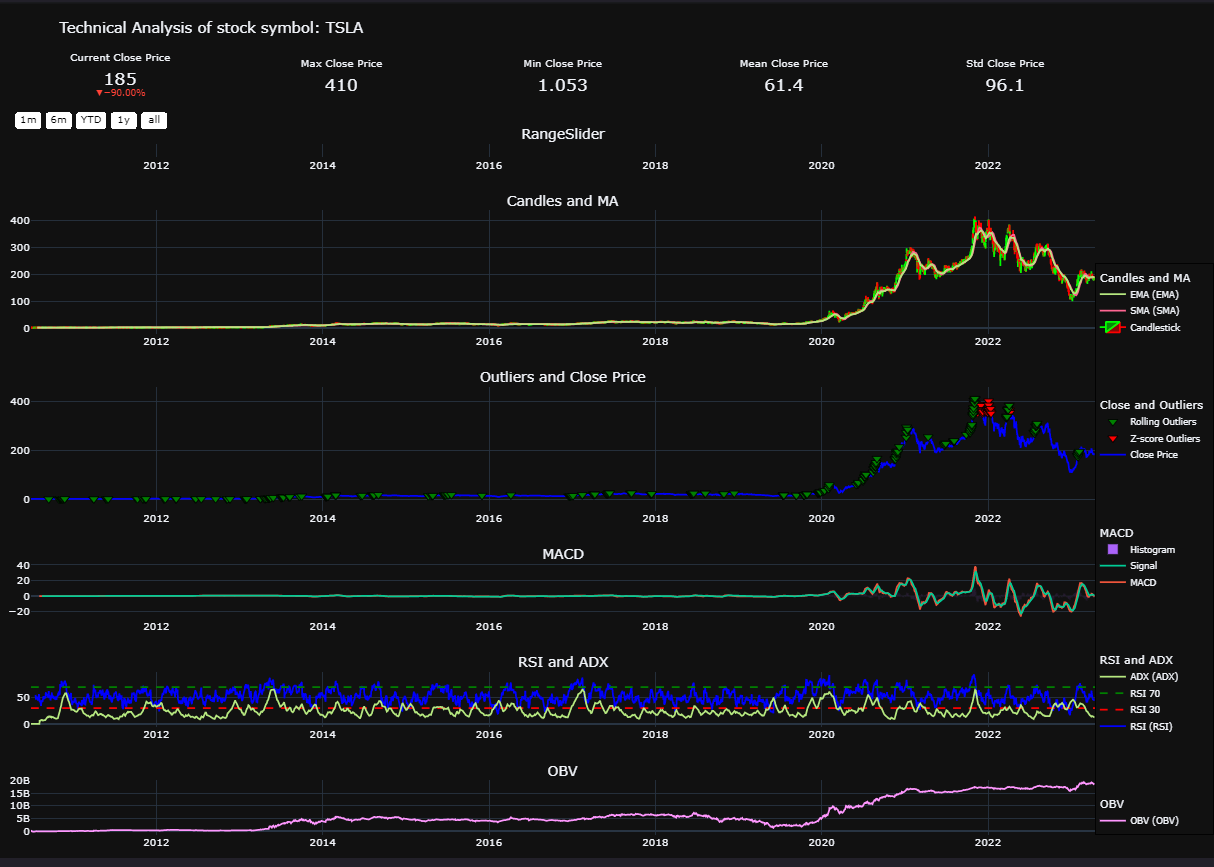

# Fundamentals Dashboard

Fundamental analysis is a method used to evaluate the intrinsic value of a security by examining various financial and economic factors. It helps investors and traders to determine if a stock, currency, or commodity is overvalued or undervalued. Here are some of the most relevant and important financial attributes used in fundamental analysis for trading:

1. **Earnings Per Share (EPS):** Represents the portion of a company's profit allocated to each outstanding share of common stock. Higher EPS values indicate better profitability and can be used to compare companies within the same industry.

1. **Price-to-Earnings Ratio (P/E Ratio)**: A valuation ratio calculated by dividing the market price per share by the earnings per share. It is widely used to determine if a stock is overvalued or undervalued. Lower P/E ratios may indicate a more attractive valuation.

1. **Revenue**: The total amount of money a company generates from its business activities. Increasing revenue over time can be an indicator of a growing company or a successful business model.

1. **Dividend Yield**: The annual dividend payment per share divided by the market price per share. A higher dividend yield may attract income-seeking investors and provide a steady stream of income.

1. **Payout Ratio**: The proportion of earnings paid out as dividends to shareholders. A lower payout ratio indicates that a company retains more earnings for growth, while a higher ratio suggests a company is distributing more of its earnings to shareholders.

1. **Price-to-Sales Ratio (P/S Ratio)**: A valuation metric calculated by dividing the market price per share by the revenue per share. It helps investors determine if a stock is overvalued or undervalued based on its sales performance.

1. **Price-to-Book Ratio (P/B Ratio)**: A valuation ratio calculated by dividing the market price per share by the book value per share. A lower P/B ratio may indicate an undervalued stock, while a higher ratio could suggest overvaluation.

1. **Debt-to-Equity Ratio**: A measure of financial leverage, calculated by dividing a company's total debt by its total equity. A lower ratio indicates lower financial risk, while a higher ratio suggests higher risk.

1. **Return on Equity (ROE)**: A measure of profitability, calculated by dividing net income by shareholder's equity. A higher ROE indicates better efficiency in generating profits from shareholders' investments.

1. **Gross Margin**: The percentage of revenue that remains after subtracting the cost of goods sold (COGS). Higher gross margins indicate better profitability and efficiency in managing production costs.

1. **Current Ratio**: A measure of liquidity, calculated by dividing a company's current assets by its current liabilities. A higher current ratio indicates better short-term financial health and the ability to cover short-term obligations.

1. **Return on Assets (ROA)**: A measure of profitability, calculated by dividing net income by total assets. A higher ROA indicates better efficiency in generating profits from the company's assets.

Noticing that info attribute of yf.Tickers has most of the financial information of a stock, we can use it to gather data regarding fundamental analysis.

In [167]:
class StockMetrics:
    """
    A class to represent financial metrics of a stock and visualize them using Plotly.

    Attributes:
    -----------
    symbol : str
        The stock symbol.
    info : dict
        A dictionary containing the stock's financial information.

    Methods:
    --------
    startup()
        Initializes the financial attributes for the stock.

    create_indicators()
        Creates a list of Plotly Indicator traces for the financial attributes.

        Returns:
        List[go.Indicator]
            A list of Plotly Indicator traces representing the financial metrics.

    create_subplot()
        Creates a Plotly Subplot using the financial attributes.

        Returns:
        go.Figure
            A Plotly Figure containing the subplot with the financial metrics.

    Usage:
    ------
    To use this class, create an instance with the stock symbol and a dictionary of the stock's financial information.
    Then call the `create_subplot()` method to get a Plotly figure with the financial metrics represented as Indicator traces.

    Example:
    --------
    >>> import plotly.graph_objs as go
    >>> from plotly.subplots import make_subplots
    >>> import numpy as np
    >>>
    >>> symbol = "AAPL"
    >>> info = {"trailingEps": 3.28, "trailingPE": 34.26, "totalRevenue": 365.7, "dividendYield": 0.0065, "payoutRatio": 0.175, "priceToSalesTrailing12Months": 7.08, "priceToBook": 31.16, "debtToEquity": 204.64, "returnOnEquity": 0.9345, "grossMargins": 0.42, "currentRatio": 1.15, "returnOnAssets": 0.2037}
    >>>
    >>> stock_metrics = StockMetrics(symbol, info)
    >>> fig = stock_metrics.create_subplot()
    >>> fig.show()
    """

    def __init__(self, symbol, info) -> None:
        self.symbol = symbol
        self.info = info
        self.startup()

    def startup(self) -> None:
        """
        Initializes the financial attributes for the stock.
        """
        self.eps = self.info.get("trailingEps", np.nan)
        self.pe_ratio = self.info.get("trailingPE", np.nan)
        self.revenue = self.info.get("totalRevenue", np.nan)
        self.dividend_yield = self.info.get("dividendYield", np.nan)
        self.payout_ratio = self.info.get("payoutRatio", np.nan)
        self.price_to_sales = self.info.get("priceToSalesTrailing12Months", np.nan)
        self.price_to_book = self.info.get("priceToBook", np.nan)
        self.debt_to_equity = self.info.get("debtToEquity", np.nan)
        self.return_on_equity = self.info.get("returnOnEquity", np.nan)
        self.gross_margin = self.info.get("grossMargins", np.nan)
        self.current_ratio = self.info.get("currentRatio", np.nan)
        self.return_on_assets = self.info.get("returnOnAssets", np.nan)

    def create_indicators(self):
        """
        Creates a list of Plotly Indicator traces for the financial attributes.

        Returns:
        --------
        List[go.Indicator]
            A list of Plotly Indicator traces.
        """
        indicators = []
        title_size = 22
        number_size = 20
        warehouse = [
            ("EPS", self.eps, "$", None),
            ("P/E Ratio", self.pe_ratio, None, None),
            ("Revenue", self.revenue, "$", None),
            ("Dividend Yield", self.dividend_yield * 100, None, "%"),
            ("Payout Ratio", self.payout_ratio * 100, None, "%"),
            ("P/S Ratio", self.price_to_sales, None, None),
            ("P/B Ratio", self.price_to_book, None, None),
            ("Debt-to-Equity", self.debt_to_equity, None, None),
            ("Return on Equity", self.return_on_equity * 100, None, "%"),
            ("Gross Margin", self.gross_margin * 100, None, "%"),
            ("Current Ratio", self.current_ratio, None, None),
            ("Return on Assets", self.return_on_assets * 100, None, "%"),
        ]
        for title, val, prefix, suffix in warehouse:
            number: dict[str, dict[str, int]] = {"font": {"size": number_size}}
            if suffix is not None:
                number |= {"suffix": suffix}
            if prefix is not None:
                number |= {"prefix": prefix}
            indicators.append(
                go.Indicator(
                    mode="number",
                    value=val,
                    number=number,
                    title={"text": title, "font": {"size": title_size}},
                )
            )

        return indicators

    def create_subplot(self) -> go.Figure:
        """
        Creates a Plotly Subplot using the financial attributes.

        Returns:
        --------
        go.Figure
            A Plotly Figure containing the subplot.
        """
        fig = make_subplots(
            rows=2,
            cols=6,
            specs=[
                [
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                ],
                [
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                    {"type": "indicator"},
                ],
            ],
        )

        indicators = self.create_indicators()

        for i, indicator in enumerate(indicators):
            row = i // 6 + 1
            col = i % 6 + 1
            fig.add_trace(indicator, row=row, col=col)

        fig.update_layout(
            title=f"{self.symbol} Financial Attributes", margin=dict(t=100)
        )

        return fig

In [169]:
# Create an instance of StockMetrics
stock_metrics = StockMetrics(stock.symbol, stock.info)

# Create the subplot
fig: go.Figure = stock_metrics.create_subplot()

# Show the plot
fig.show()